## <center>2. Feladatsor</center>

<img src="holiday.gif" width="700">

<br>
<b>1.feladat.</b> Írjunk olyan programot, mely méri hogy a MATLAB az $Ax=b$ egyenletet milyen gyorsan oldja meg $N=2^i,\ i=1,\ldots,12$ esetén, ha $A=randn(N)$ és $b=(1,\ldots,1)^T\in\mathbb{R}^N$! A mért eredményünkről készítsünk ábrát!


   2.00   0.09
   4.00   0.00
   8.00   0.00
   16.00    0.00
   32.00    0.00
   64.00    0.00
   128.00     0.00
   256.00     0.01
   512.00     0.03
   1024.00      0.11
   2048.00      0.72
   4096.00      4.59
   8192.00     37.00


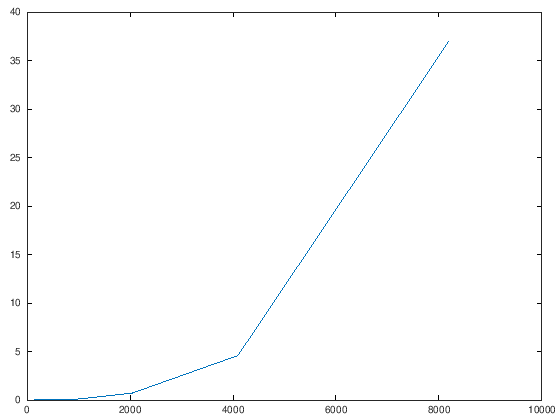

In [1]:
format bank
for j=1:13
    N=2^j;
    A=randn(N);
    %e=ones(N,1);
    %A=(N+1)^2*spdiags([-e 2*e e], [-1 0 1], N, N);
    tic
    A\ones(N,1);
    t=toc;
    disp([N,t]);
    dim(j)=N;
    time(j)=t;
end
plot(dim,time,'-')

<br>

<b>2.feladat.</b> Készítsünk loglog ábrát és értelmezzük a korábban kapott eredményeinket!

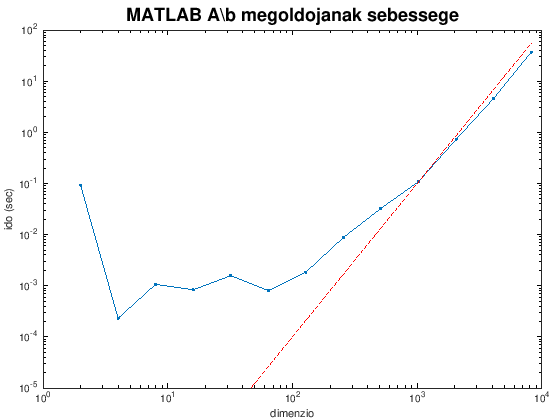

<b>3.feladat.</b> Alkalmazzuk a MATLAB LU-, Cholesky- és iLU-felbontások beépített függvényeit az alábbi LAER-re: $A=\mathrm{tridiag}(-1,2,-1)\in\mathbb{R}^{n\times n}$ vagy $A$ random mátrix és $b=(1,\ldots,1)^T\in\mathbb{R}^n$!

### Klasszikus iterációk SZPD mátrixokra (Jacobi, GS, SOR)

<br>
Tekintsük az $Ax=b$ egyenlet megoldására az alábbi egylépéses stacionárius lineáris iteratív alakot

$$x^{(k+1)}=Mx^{(k)}+v,\ \quad k=0,1,\ldots$$<br>

<u>Tétel:</u> A lineáris iteráció konzisztens $Ax=b$-vel $\Longleftrightarrow$ $\rho(M)<1$<br>

Tekintsük a szokásos $A=L+D+U$ felbontást (szig. alsó, diag, szig. felső). Ekkor a három klasszikus iteráció:

+ Jacobi
$$x^{(k+1)}=D^{-1}\big(-[L+U]x^{(k)}+b\big)$$
+ Gauss-Seidel (GS)
$$x^{(k+1)}=(L+D)^{-1}\big(-Ux^{(k)}+b\big)$$
+ SOR (Successive over-relaxation)
$$x^{(k+1)}=(D+\omega L)^{-1}\big(-[\omega U+(\omega -1)D]x^{(k)}+\omega b\big)$$
<br>

<u>Tétel:</u> Ha $A$ M-mátrix, akkor a Jacobi, GS iterációk és ezek relaxált változatai $\omega\in (0,1)$ mellett tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához<br>

<u>Tétel:</u> Ha $A$ SZDD, akkor a Jacobi és GS iterációk tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához<br>

<u>Tétel:</u> Ha $A$ SZPD, akkor a GS iteráció és SOR módszer $\omega\in (0,2)$ iterációk tetszőleges kezdeti vektor esetén konvergálnak az egyenletrendszer megoldásához <br>

<br>
<b>4.feladat.</b> Írjunk olyan programot, amely az $Ax=b$ egyenletet megoldja a Jacobi-iteráció segítségével! Az első leállási feltételnek a numerikus megoldó vektor maximumnormában mért relatív hibáját adjuk meg adott tolerancia mellett. Második leállási feltételnek pedig egy maximális iteráció számot.

<b>5.feladat.</b> A 4.feladat Gauss-Seidel iteráció esetén.

<b>6.feladat.</b> A 4.feladat SOR iteráció esetén.

<b>7.feladat.</b> A 4.feladat Richardson-iteráció esetén. Számítsuk ki $A$ spektrálsugarát, illetve határozzuk meg mely $p$ értékek esetén lesz a Richardson-iteráció konvergens! Ezen értékek közül melyik az optimális? 